## PRiAD 3 

# Podstawowe miary danych

Wczytanie niezbędnych pakietów.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

## 1. Braki w danych



Często spotykaną sytuacją w analizie danych jest występowanie braków w macierzy (ramce) danych. Do reprezentacji brakującej danej wykorzystuje się dostępną w pakiecie `numpy` wartość "not a number" - `np.nan`.

Tworzymy ramkę danych z wartościami `nan`

In [2]:

df = pd.DataFrame(np.random.randn(7,5),columns=list('ABCDE'))
df.iloc[3,0] = np.nan
df.iloc[3,3] = np.nan
df.iloc[4,2] = np.nan
df.iloc[4,3] = np.nan
df.iloc[1,:] = [np.nan,np.nan,np.nan,np.nan,999]
df

,A,B,C,D,E
0,0.56,-2.64,-0.36,0.65,0.99
1,nan,nan,nan,nan,999.00
2,-0.18,1.03,-0.44,-2.35,0.60
3,nan,-2.00,-1.19,nan,0.51
4,-0.67,-0.57,nan,nan,0.92
5,0.31,-0.89,0.94,-0.44,-1.80
6,0.00,-0.67,1.76,0.44,0.49


Miejsca w których znajdują się brakujące dane można pozyskać metodą `isnull`.

In [3]:
pd.isnull(df)

,A,B,C,D,E
0,False,False,False,False,False
1,True,True,True,True,False
2,False,False,False,False,False
3,True,False,False,True,False
4,False,False,True,True,False
5,False,False,False,False,False
6,False,False,False,False,False


> **Zadanie** Napisz funkcję zliczającą brakujące dane. Funkcja powinna zwracać dwie listy (lub wektory albo słowniki) - pierwsza zawierające liczby braków w kolejnych obiektach (wiersze), druga dla kolejnych atrybutów (kolumny).

In [4]:
# miejsce na rozwiązanie zadania


Brakujące dane mogą zostać usunięte za pomocą metody `dropna`, której argumenty decydują o szczegółowym sposobie działania.

In [5]:
# usuwanie wierszy (obiektów) z brakami
df.dropna()

,A,B,C,D,E
0,0.56,-2.64,-0.36,0.65,0.99
2,-0.18,1.03,-0.44,-2.35,0.60
5,0.31,-0.89,0.94,-0.44,-1.80
6,0.00,-0.67,1.76,0.44,0.49


In [6]:
# usuwanie atrybutów (kolumn) z brakami
df.dropna(axis='columns')

,E
0,0.99
1,999.00
2,0.60
3,0.51
4,0.92
5,-1.80
6,0.49


Argument `how` określa warunek jaki musi być spełniony by obiekt mógł zostac usunięty - jeśli wszystkie jego atrybuty są nieznane (`all`) lub jeśli nieznany jest jakikolwiek jego atrybut (`any` - wartość domyślna)

In [7]:
print(df.iloc[:,0:4])
print(df.iloc[:,0:4].dropna(how='all'))
print(df.iloc[:,0:4].dropna(how='any'))

      A     B     C     D
0  0.56 -2.64 -0.36  0.65
1   nan   nan   nan   nan
2 -0.18  1.03 -0.44 -2.35
3   nan -2.00 -1.19   nan
4 -0.67 -0.57   nan   nan
5  0.31 -0.89  0.94 -0.44
6  0.00 -0.67  1.76  0.44
      A     B     C     D
0  0.56 -2.64 -0.36  0.65
2 -0.18  1.03 -0.44 -2.35
3   nan -2.00 -1.19   nan
4 -0.67 -0.57   nan   nan
5  0.31 -0.89  0.94 -0.44
6  0.00 -0.67  1.76  0.44
      A     B     C     D
0  0.56 -2.64 -0.36  0.65
2 -0.18  1.03 -0.44 -2.35
5  0.31 -0.89  0.94 -0.44
6  0.00 -0.67  1.76  0.44


Alternatywą do usunięcia wartości nieznanych jest wstawienie w ich miejsce pewnych ustalonych wartości. Do tego celu wykorzystuje się metodę `fillna`.

In [8]:
df.fillna(123)
# df.fillna(value=123) # alternatywnie

,A,B,C,D,E
0,0.56,-2.64,-0.36,0.65,0.99
1,123.00,123.00,123.00,123.00,999.00
2,-0.18,1.03,-0.44,-2.35,0.60
3,123.00,-2.00,-1.19,123.00,0.51
4,-0.67,-0.57,123.00,123.00,0.92
5,0.31,-0.89,0.94,-0.44,-1.80
6,0.00,-0.67,1.76,0.44,0.49


Brakujące wartości mogą zostać także wypełnione wartościami z sąsiadujących obiektów znajdujących się pod (`ffill`) lub nad (`bfill`) 

In [9]:
df.fillna(method='ffill')

,A,B,C,D,E
0,0.56,-2.64,-0.36,0.65,0.99
1,0.56,-2.64,-0.36,0.65,999.00
2,-0.18,1.03,-0.44,-2.35,0.60
3,-0.18,-2.00,-1.19,-2.35,0.51
4,-0.67,-0.57,-1.19,-2.35,0.92
5,0.31,-0.89,0.94,-0.44,-1.80
6,0.00,-0.67,1.76,0.44,0.49


In [10]:
df.fillna(method='bfill')

,A,B,C,D,E
0,0.56,-2.64,-0.36,0.65,0.99
1,-0.18,1.03,-0.44,-2.35,999.00
2,-0.18,1.03,-0.44,-2.35,0.60
3,-0.67,-2.00,-1.19,-0.44,0.51
4,-0.67,-0.57,0.94,-0.44,0.92
5,0.31,-0.89,0.94,-0.44,-1.80
6,0.00,-0.67,1.76,0.44,0.49


> **Zadanie** W pliku `pasazerowie_lot.xls` zawarte są dane o liczbie pasażerów samolotów w latach 2005-16 w państwach należących do Unii Europejskiej oraz z nią stowarzyszonych. Dane pochodzą z [serwisu internetowego EUROSTAT-u](http://ec.europa.eu/eurostat/data/database). Wykonaj następujące zadania:
* wczytaj plik 
* zastanów się, jaka jest najwygodniesza postać ramki danych do dalszego przetwarzania - przekształć dane do tej postaci
* usuń wszystkie obiekty, w których występuje choć jeden brak
* narysuj wykres słupkowy pokazujący łączną liczbę przewiezionych pasażerów z podziałem na lata, słupki powinny być posortowane od najkrótszego (najmniej pasażerów), do najdłuższego (najwięcej przewiezionych pasażerów)

In [11]:
# miejsce na rozwiązanie zadania


## 2. Miary pojedynczego atrybutu

Podstawowe miary słuzące do opisu pojedynczego atrybutu to miary tendencji centralnej i miary rozrzutu. **Miary tendencji centralnej** wskazują na "środek" zbioru danych. Do podstawowych miar należą: średnia arytmetyczna, mediana i moda. Inne, przykładowe miary to średnie geometryczna, harmoniczna, ważona. 

> **Zadanie** W poniższym przykładzie wykorzystano dane o zarobkach (w tysiącach złotych) w dwóch firmach o takiej samej liczbie pracowników, umieszczone w ramce danych. Wyznaczono także przeciętne wynagrodzenie w obu firmach jako średnią arytmetyczną oraz jako medianę.
* Wyświetl wykres kolumnowy pokazujący zarobki poszczególnych pracowników w każdej z firm.
* Przeanalizuj i porównaj strukturę zarobków w obu firmach.
* Aplikując o pracę i mając jedynie dane o przeciętnym wynagrodzeniu, którą firmę należałoby wybrać?
* Która miara lepiej oddaje sens pojęcia "przeciętne wynagrodzenie" ? 
* Z której miary i dlaczego korzysta się podając dane o przeciętnym wynagrodzeniu ?

In [12]:
b = pd.DataFrame(columns=['firma A', 'firma B'])
b.loc[:,'firma A']=[ 2.2, 3.4, 4.3, 4.4, 4.5, 5.5, 6.6, 5.6, 5.6, 6.0, 6.1, 6.3, 7.4, 8.5, 7.7, 7.8, 10.2,11.3,15.1]
b.loc[:,'firma B']=[ 3.2, 3.4, 3.3, 3.4, 3.5, 4.5, 3.6, 4.4, 4.5, 5.0, 5.1, 5.3, 5.4, 5.5, 6.7, 6.8, 25.2,30.3,35.1]
for f in [0,1]:
    print("Przeciętne wynagrodzenie - %s - jako średnia: %.2f i jako mediana %.2f" 
           %(b.columns.values[f], b.iloc[:,f].mean(), b.iloc[:,f].median()))
# tu umieść kod rysujący wykres(y)


Przeciętne wynagrodzenie - firma A - jako średnia: 6.76 i jako mediana 6.10
Przeciętne wynagrodzenie - firma B - jako średnia: 8.64 i jako mediana 5.00


Miary tendencji centralnej są jednymi z najprostszych miar opisujących skupiska danych, klasy, grupy itp. W przypadku grup wyraźnie wyodrębnionych w przestrzeni atrybutów dość dobrze charakteryzują ich położenie w tej przestrzeni. 

In [13]:
# funkcja pomocnicza - statystyki klas umieszczone obok siebie
# ostatni atrybut jest decyzyjny (wskazuje na klasę)
def opisz_klasy(ramka_wej):
    df = ramka_wej.copy()
    d = df.describe()
    d.loc['klasa',:] = 'całość'
    # indeks -1 -> ostatni atrybut, zakładamy, że zawiera informację o klasie
    for k in list(df.iloc[:,-1].unique()): 
        desc = df[df.iloc[:,-1] == k].describe()
        desc.loc['klasa',:] = k
        d = pd.concat([d, desc], axis=1, sort=False)
    return d

      atrybut1 atrybut2 atrybut1 atrybut2 atrybut1 atrybut2 atrybut1 atrybut2
klasa   całość   całość  klasa 3  klasa 3  klasa 1  klasa 1  klasa 2  klasa 2
count    80.00    80.00    37.00    37.00    24.00    24.00    19.00    19.00
mean     49.01    41.27    74.16    31.86    38.46    73.25    13.37    19.21
50%      47.50    34.50    74.00    31.00    39.50    72.00    14.00    20.00


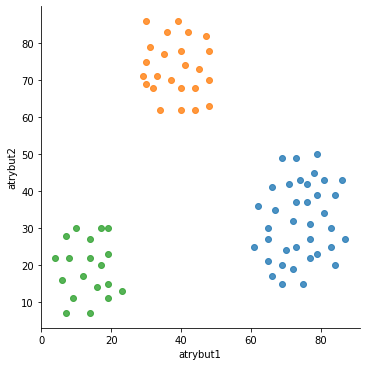

In [14]:
df = pd.read_csv('dane1.csv')
atrybuty = list(df.columns)
print(opisz_klasy(df).loc[['klasa','count','mean','50%'],:])
sns.lmplot(x=atrybuty[0], y=atrybuty[1], data=df, fit_reg=False, hue=atrybuty[-1], legend = False)

> **Zadanie** Obserwując uzyskane w powyższym przykładzie i, ewentualnie, stosownie modyfikując kod:
* Zastanów się co mówią nam o zbiorze średnie wartości atrybutów wyznaczone dla całego zbioru i dla poszczególnych klas 
* Określ połozenie wartości średnich na wykresie - jakie kolory punktów na wykresie są przypisane poszczególnym klasom ?
* Wykonaj podobne eksperymenty na pozostałych zbiorach `dane2`,...,`dane11`, wyciągnij wnioski, czy zawsze wartości średnie w klasach dobrze je opisują ?

**Miary rozrzutu (rozproszenia)** pozwalają na określenie stopnia skupienia danych wokół ich centrum (określonego przez mairy tendencji centralnej). Podstawowymi klasycznymi miarami rozrzutu są: odchylenie standardowe, jego kwadrat czyli wariancja.

Specyficznym rodzajem miar są miary pozycyjne, które wskazują konkretne elementy w uporządkowanym (posortowanym) zbiorze danych. Do miar pozycyjnych zaliczamy: wartości skrajne (minimialną i maksymalną) oraz kwartyle. Wartości skrajne opisują zakres zmienności danego atrybutu. 
Kwartyle są to punkty podziału zbioru danych w proporcjach:
* pierwszy kwartyl (25%) oddziela 25% danych o najniższych wartościach od reszty
* drugi kwartyl (50%) - mediana, dzieli dane na pół
* trzeci kwartyl (75%) - rozdziela 25% danych o najwyższych wartościach od pozostałych danych o wartościach mniejszych

Różnica między trzecim i pierwszym kwartylem to rozstęp miedzykwartylowy, zaś jego połowa to odchylenie ćwiartkowe.

dane1.csv
      atrybut1 atrybut2 atrybut1 atrybut2 atrybut1 atrybut2 atrybut1 atrybut2
count    80.00    80.00    37.00    37.00    24.00    24.00    19.00    19.00
mean     49.01    41.27    74.16    31.86    38.46    73.25    13.37    19.21
std      26.01    23.38     6.96    10.20     6.42     7.53     5.47     7.66
min       4.00     7.00    61.00    15.00    29.00    62.00     4.00     7.00
25%      29.75    22.00    69.00    24.00    32.75    68.00     8.50    13.50
50%      47.50    34.50    74.00    31.00    39.50    72.00    14.00    20.00
75%      73.00    64.25    79.00    41.00    44.00    78.25    18.00    25.00
max      87.00    86.00    87.00    50.00    48.00    86.00    23.00    30.00
klasa   całość   całość  klasa 3  klasa 3  klasa 1  klasa 1  klasa 2  klasa 2


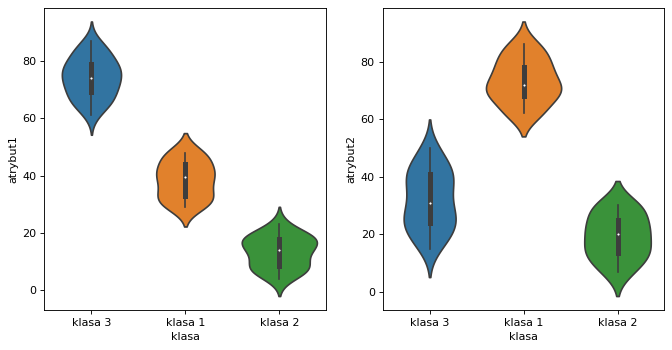

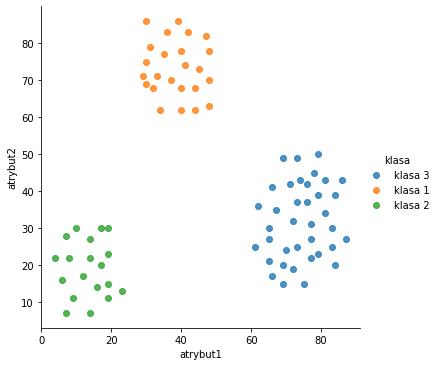

In [15]:
dane = 'dane1.csv'
df = pd.read_csv(dane)
atrybuty = list(df.columns)
print(dane)
print(opisz_klasy(df))
# wykres skrzypcowy
plt.figure(figsize=(10,5), dpi= 80)
plt.subplot(1,2,1)
sns.violinplot(x=atrybuty[-1], y=atrybuty[0], data=df)
plt.subplot(1,2,2)
sns.violinplot(x=atrybuty[-1], y=atrybuty[1], data=df)
sns.lmplot(x=atrybuty[0], y=atrybuty[1], data=df, fit_reg = False, hue=atrybuty[-1])

> **Zadanie** Obejrzyj dostępne miary danych dla innych zbiorów `dane2`,...,`dane11`. Zwróć szczególną uwagę na:
* wartość odchylenia standardowego w poszczególnych klasach - jak stopień skupienia danych wokół średniej (zaobserwuj na wykresie) przekłada się na wartość odchylenia standardowego 
* położenie poszczególnych kwartyli na wykresach skrzypcowych
* jak zmiana dystrybucji punktów (wykresy) w różnych zbiorach wpływa na poszczególne miary

> **Zadanie** Znajdź w danych z pliku `pasazerowie_lot.xls` państwa o:
* największym i najmniejszym bezwzględnym przyroście liczby pasażerów w całym obserwowanym okresie
* największym i najmniejszym względnym przyroście liczby pasażerów w całym obserwowanym okresie
* lata o największym i najmniejszym przyroście liczby pasażerów w Polsce
* lata o największym i najmniejszym przyroście liczby pasażerów we wszystkich obserwowanych państwach
* zastanów się każdorazowo nad możliwymi iterpretacjami wyników

In [16]:
# Miejsce na kod


Możliwości analizy konkretnych danych mogą istotnie wzrosnąć, jeśli dane te zostaną skojarzone z danymi pochodzącymi z innych źródeł. Poniższy przykład pokazuje, w jaki sposób można uzupełnić dane o przewozach lotniczych, ogólnodostępnymi danymi o poszczególnych państwach (wielkość populacji, powierzchnia) by obliczyć finalnie przykładowy nowy parametr - stosunek liczby przewiezionych pasażerów w 2016 roku do populacji danego państwa (z roku 2020). Końcowy wynik jest wyświetlany dla państw liczących więcej niż 5 mln. mieszkańców.  

In [17]:
# wczytanie danych o przewozach lotniczych
sam = pd.read_excel('pasazerowie_lot.xls', header = 2,usecols = range(0,13))
sam.index = sam['geo\\time'].rename('kraj')
sam = sam.drop(columns = ['geo\\time']).dropna() #.sort_values(by='kraj')
sam['Populacja'] = 0
sam['Powierzchnia'] = 0
# podbranie danych o krajach świata
panstwa = pd.read_excel('alphabetical-list-of-countries2020.xlsx',header = 4,usecols = range(1,5), index_col = 0)
print(panstwa.head())
# skojarzenie danych
sam_kraje = list(sam.index);
for ind_kraju in range(0,len(sam_kraje)):
    dane_kraju = panstwa[panstwa.Country == sam_kraje[ind_kraju]]
    if (not dane_kraju.empty):
        sam.iloc[ind_kraju,12] = dane_kraju.iloc[0,1] # populacja 
        sam.iloc[ind_kraju,13] = dane_kraju.iloc[0,2] # powierzchnia   
sam['procentowo2016']=(sam['2016']*100)/sam.Populacja
sam_duze = sam[sam.Populacja>5000000].sort_values(by = '2016')
#sam_duze = sam[sam.Populacja>5000000].sort_values(by = 'procentowo2016')
istotne_atrybuty = ['2016', 'Populacja', 'procentowo2016'];
print(sam_duze.loc[:,istotne_atrybuty ],"\n")
print(sam_duze.loc[:,istotne_atrybuty ].describe())


       Country  Population  Land Area
#                                    
1  Afghanistan    38928346     652.86
2      Albania     2877797      27.40
3      Algeria    43851044  2,381,740
4      Andorra       77265        470
5       Angola    32866272  1,246,700
                       2016  Populacja  procentowo2016
kraj                                                  
Slovakia         2158261.00    5459642           39.53
Hungary         11668151.00    9660351          120.78
Romania         15153719.00   19237691           78.77
Finland         18099954.00    5540720          326.67
Austria         27181511.00    9006398          301.80
Belgium         30115832.00   11589623          259.85
Poland          32266742.00   37846611           85.26
Denmark         32763142.00    5792202          565.64
Sweden          35952558.00   10099265          355.99
Norway          37727546.00    5421241          695.92
Portugal        40930044.00   10196709          401.40
Greece          455

> **Pytanie** Jedno z państw nie zostało prawidłowo przetworzone. Które ? Dlaczego ?

> **Pytanie** Jak można zinterpretować powyższe dane i ich miary wraz z wcześniejszymi obserwacjami tego samego zbioru danych ? Jak sądzisz, czy ruch lotniczy w Polsce będzie rósł w najbliższej przyszłości ?

> **Zadanie** Wczytaj dane z pliku `waluty1.xls`. Wykorzystujac miary tendencji centralnej oraz miary rozrzutu określ dla każdej waluty w którym półroczu którego roku (rozważ jedynie półrocza, dla których znane są wszystkie kursy) kurs był najwyższy, najniższy (biorąc pod uwagę jego wartość średnią w danym okresie) oraz wykazywał największą zmienność.

## 3. Miary współzależności

Miary współzależności pozwalają na określenie czy i w jakim stopniu poszczególne atrybuty są od siebie zależne. Podstawowymi miarami zależności liniowej są **korelacja** i **kowariancja**. 

In [18]:
# funkcja pomocnicza - macierze kowariacji i korelacji klas umieszczone obok siebie
# ostatni atrybut w ramce wejściowej jest decyzyjny (wskazuje na klasę)
def opisz_klasy2(ramka_wej):
    df = ramka_wej.copy()
    d_cov = df.cov()
    d_cov.loc[:,'klasa'] = 'całość'
    d_corr = df.corr();
    d = pd.concat([d_cov, d_corr], axis=1, sort=False)
    # indeks -1 -> ostatni atrybut, zakładamy, że zawiera informację o klasie
    for k in list(df.iloc[:,-1].unique()): 
        d_cov = df[df.iloc[:,-1] == k].cov()
        d_cov.loc[:,'klasa'] = k
        d_corr = df[df.iloc[:,-1] == k].corr();
        desc = pd.concat([d_cov, d_corr], axis=1, sort=False)
        d = pd.concat([d, desc], axis=0, sort=False)
    return d

Poniższy przykład pokazuje macierze korelacji i kowariancji dla zbioru `dane1.csv` bez podziału na klasy (miary liczone dla zbioru wszystkich obiektów) oraz dla każdej z klas z osobna.

dane1.csv
          atrybut1  atrybut2    klasa  atrybut1  atrybut2
atrybut1    676.52    -20.47   całość      1.00     -0.03
atrybut2    -20.47    546.51   całość     -0.03      1.00
atrybut1     48.42     11.94  klasa 3      1.00      0.17
atrybut2     11.94    104.12  klasa 3      0.17      1.00
atrybut1     41.22     -5.25  klasa 1      1.00     -0.11
atrybut2     -5.25     56.72  klasa 1     -0.11      1.00
atrybut1     29.91     -0.75  klasa 2      1.00     -0.02
atrybut2     -0.75     58.73  klasa 2     -0.02      1.00


<Figure size 800x400 with 0 Axes>

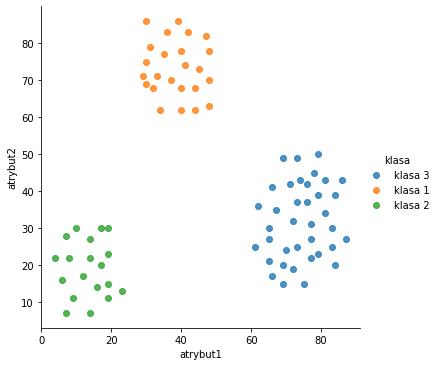

In [19]:
dane = 'dane1.csv'
df = pd.read_csv(dane)
atrybuty = list(df.columns)
print(dane)
print(opisz_klasy2(df))
# wykres punktowy
plt.figure(figsize=(10,5), dpi= 80)
sns.lmplot(x=atrybuty[0], y=atrybuty[1], data=df, fit_reg = False, hue=atrybuty[-1])

In [20]:
df

,atrybut1,atrybut2,klasa
0,86,43,klasa 3
1,79,50,klasa 3
2,73,49,klasa 3
3,69,49,klasa 3
4,74,43,klasa 3
...,...,...,...
75,14,22,klasa 2
76,7,28,klasa 2
77,8,22,klasa 2
78,6,16,klasa 2


>**Zadanie** Przeanalizuj wartości korelacji i kowariacji dla zbioru `dane1` (przykład powyżej). Jakim dystrybucjom punktów na wykresie odpowiadają różne wartości tych miar? Wykonaj podobne eksperymenty dla pozostałych zbiorów `dane2`,...,`dane11`


Zbiór `mtcars.csv` zawiera 12 cech kilkudziesięciu samochodów dostępnych na rynku amerykańskim w latach 70-tych. Szczegółowy opis zbioru jest dostępny [tutaj](https://rpubs.com/neros/61800).

In [21]:
df = pd.read_csv("mtcars.csv")
df.index = df.model
df = df.drop(columns =['model'])
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


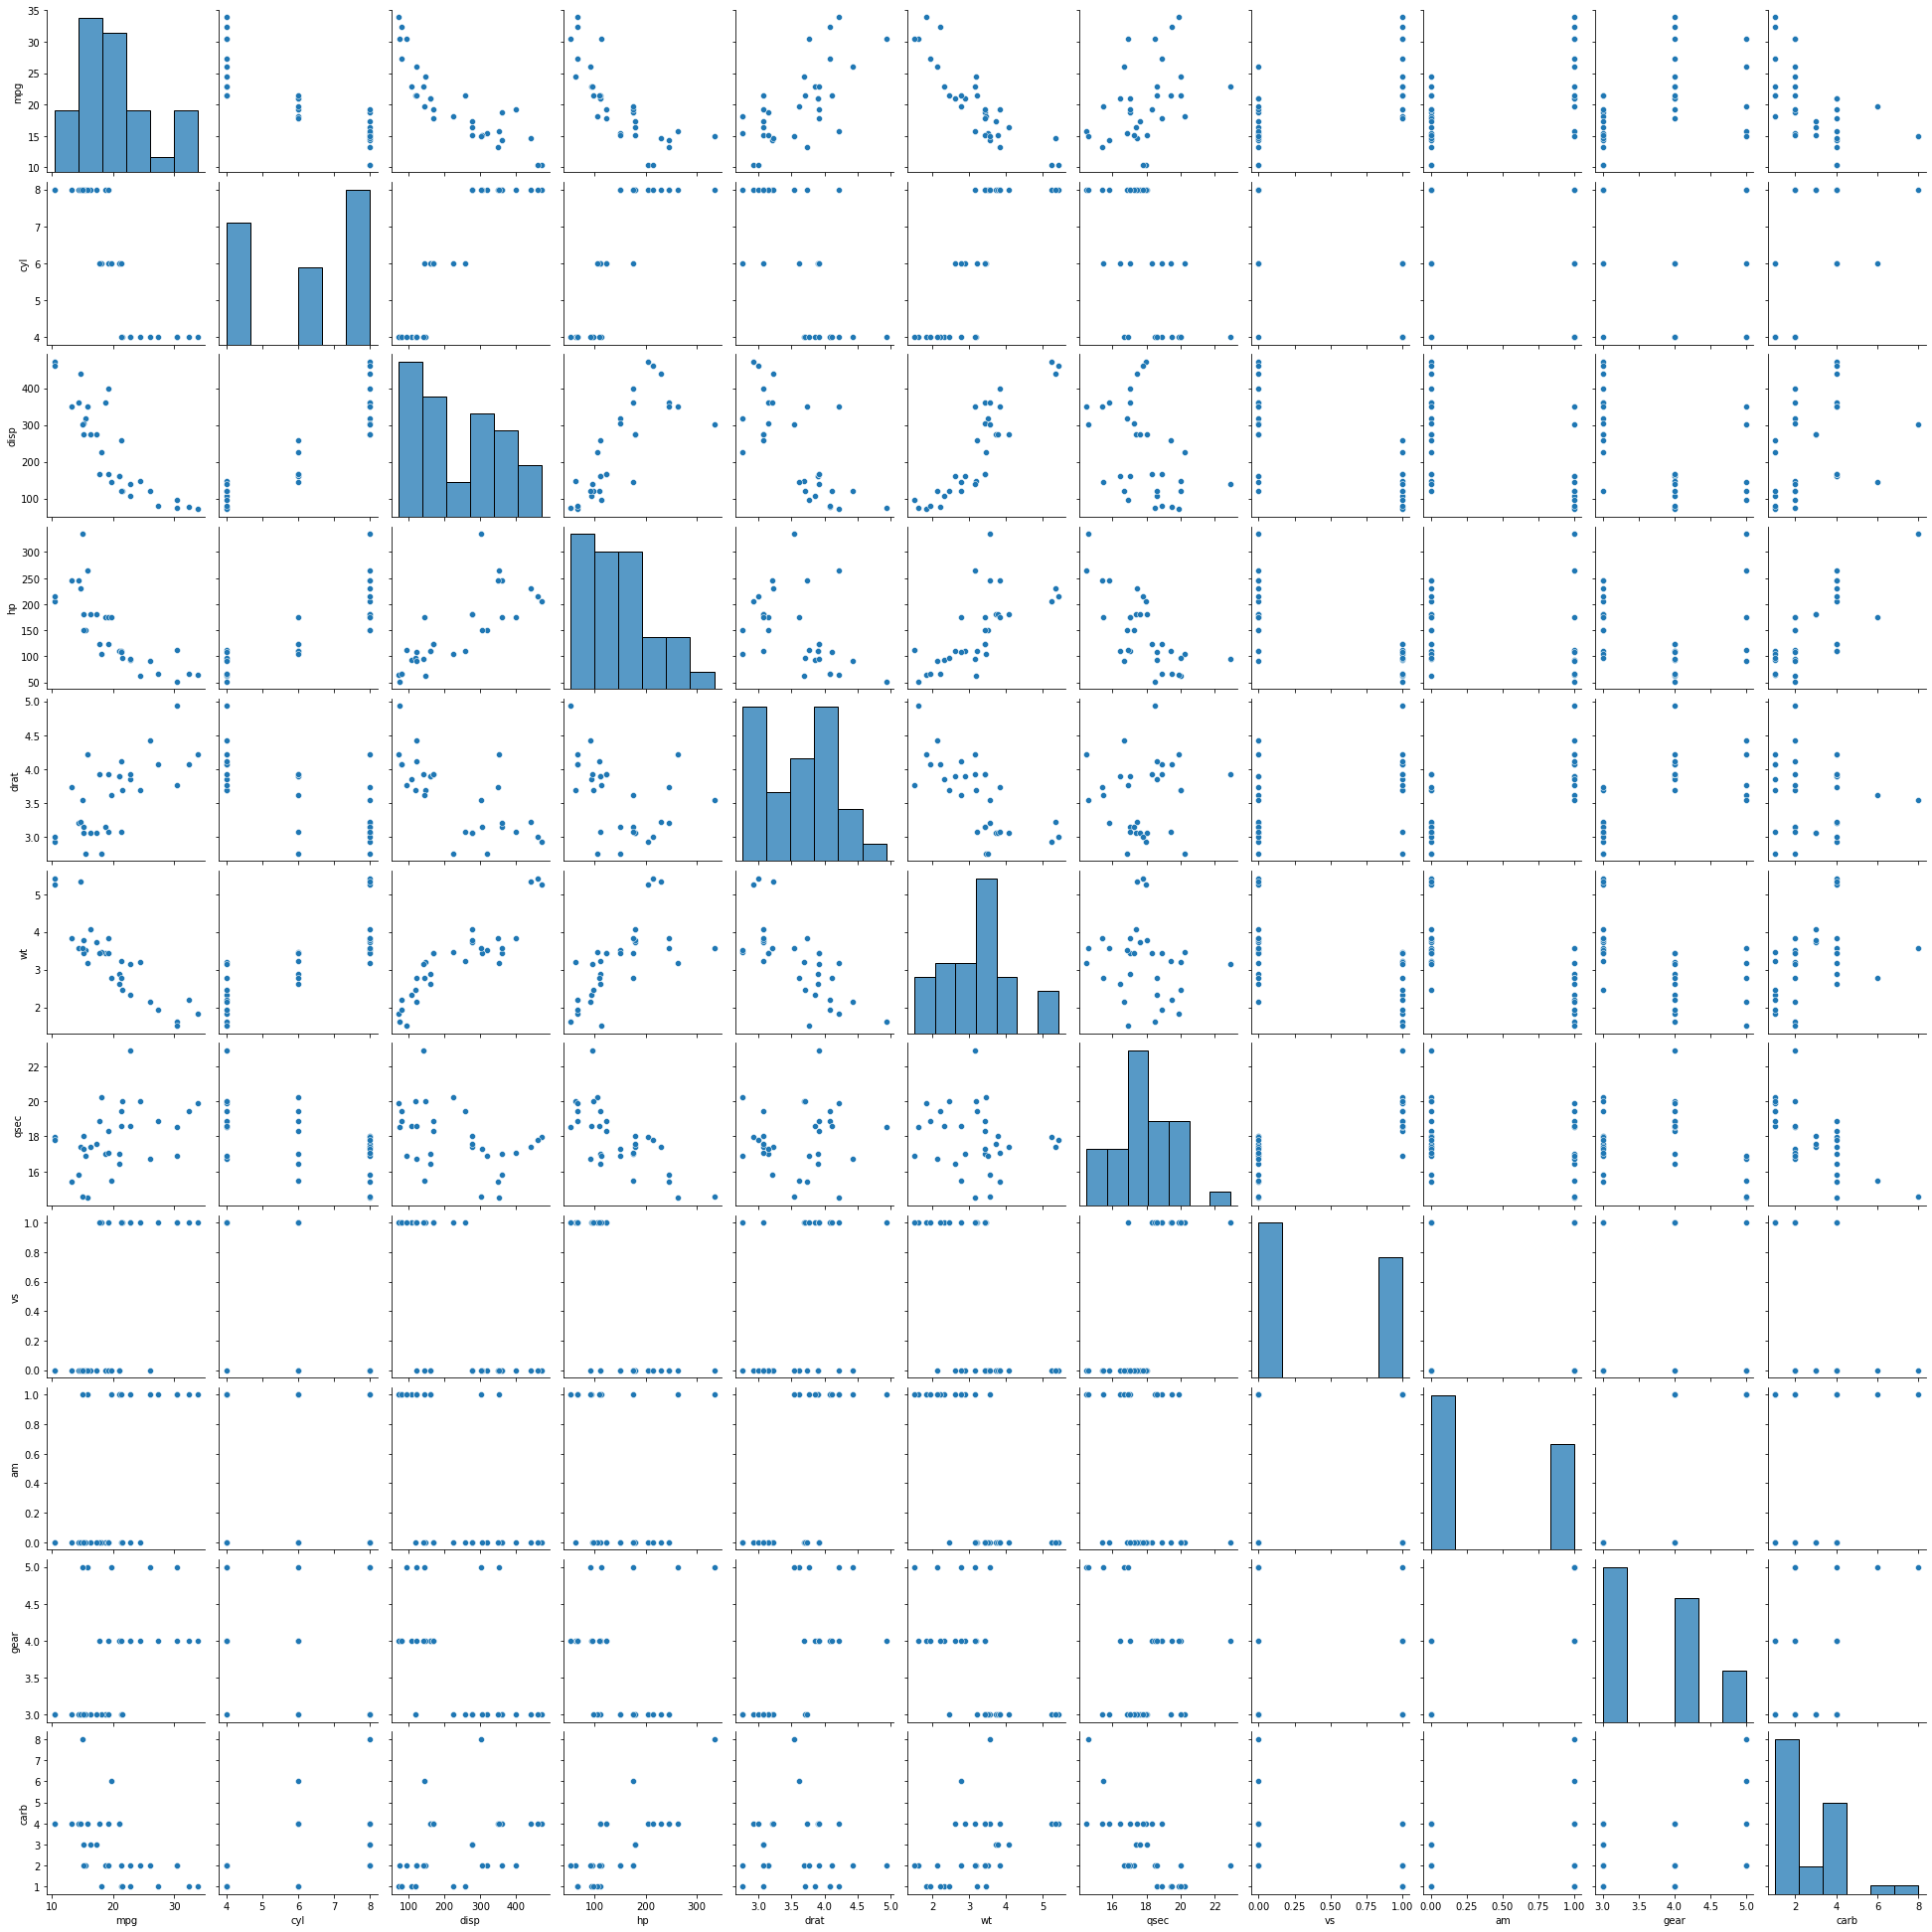

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [22]:
sns.pairplot(df, kind="scatter")
plt.show()
df.corr()

Macierz korelacji może zostać wyświetlona jako tzw. "mapa ciepła", gdzie poszczególnym poziomom współczynnika odpowiadają barwy.

<AxesSubplot:>

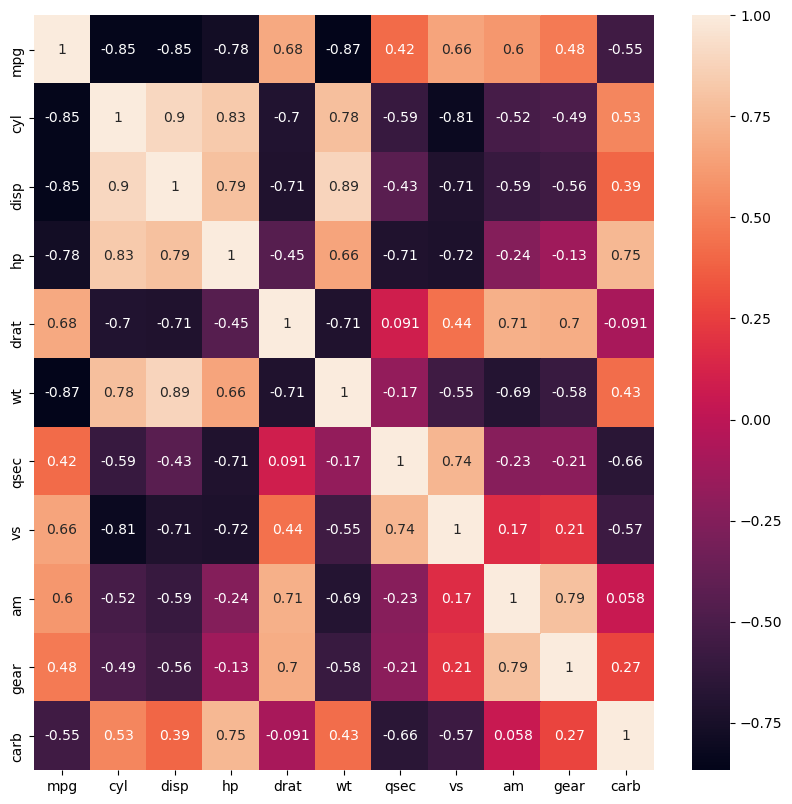

In [23]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df.corr(),annot = df.corr())
#plt.show

>**Zadanie** Znajdź atrybuty najbardziej i najmniej skorelowane w macierzy `mtcars`, jak wyglądają wykresy punktowe danych skorelowanych dodatnio, ujemnie i nieskorelowanych? W miarę możliwości spróbuj zinterpretować wyniki. Na przykład - jak skorelowane są np.:
* zużycie paliwa (mpg) z mocą silnika (hp) ?
* pojemnośc silnika (disp) i masa (wt) ?

>**Zadanie** Napisz kod umożliwiający ocenę stopnia korelacji kursów walut (z dowolnego źródła danych) w poszczególnych latach oraz w całym okresie dla którego dane są dostępne. Które waluty były skorelowane najmocniej, a które najsłabiej? O czym może świadczyć korelacja kursów dwóch walut?

> **Zadanie** Wykonaj komplet opisanych do tej pory analiz dla zbioru `iris.csv`. Wyciągnij wnioski.

## 4. Analiza danych tekstowych

Surowe dane tekstowe, w przeciwieństwie do ramek danych i obrazów, są danymi niestrukturyzowanymi. Brak ściśle określonej struktury nie oznacza jednak, że nie można dla tego typu danych wyznaczać statystyk opisowych. Dane tego typu są przechowywane w postaci prostych łańcuchów znaków lub bardziej złożonych struktur danych, w których skład wchodzą łańcuchy znaków. W poniższym przykładzie dane są przechowywane w postaci listy linijek tekstu. 

In [24]:
pantadeusz_org = []
ograniczniki = ["\\n", "'"]
with open('pan Tadeusz.txt', encoding='utf-8') as f:
    for line in f:
        linijka = repr(line)
        for znak in ograniczniki:
            linijka = linijka.replace(znak,"")
        if not(linijka == ""):
            pantadeusz_org.append(linijka)
print(pantadeusz_org[0:10])

['Adam Mickiewicz', 'Pan Tadeusz czyli ostatni zajazd na Litwie', 'ISBN 978-83-288-2495-9', 'Księga pierwsza', 'Gospodarstwo', 'Powrót panicza — Spotkanie się pierwsze w pokoiku, drugie u stołu — Ważna Sędziego nauka o grzeczności — Podkomorzego uwagi polityczne nad modami — Początek sporu o Kusego i Sokoła — Żale Wojskiego — Ostatni Woźny Trybunału — Rzut oka na ówczesny stan polityczny Litwy i Europy', '    Litwo! Ojczyzno moja! ty jesteś jak zdrowie:', 'Ile cię trzeba cenić, ten tylko się dowie,', 'Kto cię stracił. Dziś piękność twą w całej ozdobie', 'Widzę i opisuję, bo tęsknię po tobie.']


Lista `pantadeusz_org` zawiera, oprócz liter, także i znaki interpunkcyjne. Znaki te, na potrzeby dalszej analizy tekstu powinny zostać usnięte. Przy okazji wszystkie wielkie litery zostaną zamienione na małe. 

In [25]:
pantadeusz = []
niepotrzebne_znaki = ["!",",", ".","    ",":",";","?","(",")","— "] 
for linijka in pantadeusz_org:
    for znak in niepotrzebne_znaki:
        linijka = linijka.replace(znak,"").lower()
    pantadeusz.append(linijka) 
print(pantadeusz[0:10])

['adam mickiewicz', 'pan tadeusz czyli ostatni zajazd na litwie', 'isbn 978-83-288-2495-9', 'księga pierwsza', 'gospodarstwo', 'powrót panicza spotkanie się pierwsze w pokoiku drugie u stołu ważna sędziego nauka o grzeczności podkomorzego uwagi polityczne nad modami początek sporu o kusego i sokoła żale wojskiego ostatni woźny trybunału rzut oka na ówczesny stan polityczny litwy i europy', 'litwo ojczyzno moja ty jesteś jak zdrowie', 'ile cię trzeba cenić ten tylko się dowie', 'kto cię stracił dziś piękność twą w całej ozdobie', 'widzę i opisuję bo tęsknię po tobie']


W kolejnym kroku, odrzucone zostaną zbyt długie i zbyt ktrótkie linijki tekstu. Jednocześnie, utworzona zostanie nowa struktura - lista zawierająca listy wyrazów w poszczególnych linijkach.

In [26]:
pt_slowa = []
for linijka in pantadeusz:
    slowa_linijki = linijka.split()
    if ( (len(slowa_linijki) > 2) and (len(slowa_linijki) < 20) ):
        pt_slowa.append(slowa_linijki)
pt_slowa[0:10]

[['pan', 'tadeusz', 'czyli', 'ostatni', 'zajazd', 'na', 'litwie'],
 ['litwo', 'ojczyzno', 'moja', 'ty', 'jesteś', 'jak', 'zdrowie'],
 ['ile', 'cię', 'trzeba', 'cenić', 'ten', 'tylko', 'się', 'dowie'],
 ['kto', 'cię', 'stracił', 'dziś', 'piękność', 'twą', 'w', 'całej', 'ozdobie'],
 ['widzę', 'i', 'opisuję', 'bo', 'tęsknię', 'po', 'tobie'],
 ['panno', 'święta', 'co', 'jasnej', 'bronisz', 'częstochowy'],
 ['i', 'w', 'ostrej', 'świecisz', 'bramie', 'ty', 'co', 'gród', 'zamkowy'],
 ['nowogródzki', 'ochraniasz', 'z', 'jego', 'wiernym', 'ludem'],
 ['jak', 'mnie', 'dziecko', 'do', 'zdrowia', 'powróciłaś', 'cudem'],
 ['gdy', 'od', 'płaczącej', 'matki', 'pod', 'twoją', 'opiekę']]

Na tak przygotowanym tekście można przeprowadzić proste analizy. 

Średnia długość wyrazu: 5.195, zmienność: 2.698, min: 1.000, maks: 48.000
Średnia liczba słów w wersie: 6.858, zmienność: 1.297, min: 3.000, maks: 18.000
Średnia liczba liter w wersie: 35.629, zmienność: 4.275, min: 7.000, maks: 133.000


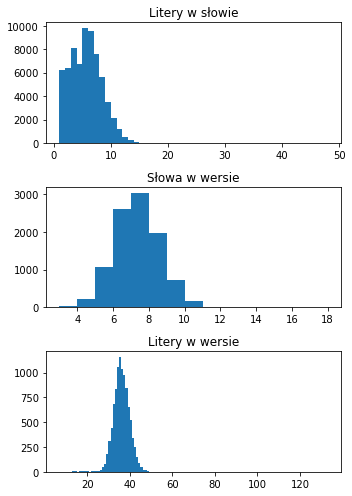

In [27]:
lit_w_slowie = []
slow_w_wersie = []
lit_w_wersie = []
for linijka in pt_slowa:
    slow_w_wersie.append(len(linijka))
    ile_liter_w_wersie = 0
    for slowo in linijka:
        dlug_slowa = len(slowo)
        lit_w_slowie.append(dlug_slowa)
        ile_liter_w_wersie += dlug_slowa
    lit_w_wersie.append(ile_liter_w_wersie)
lit_w_slowie = np.array(lit_w_slowie)
slow_w_wersie = np.array(slow_w_wersie)
lit_w_wersie = np.array(lit_w_wersie)
print("Średnia długość wyrazu: %2.3f, zmienność: %2.3f, min: %2.3f, maks: %2.3f" % (lit_w_slowie.mean(), lit_w_slowie.std(), lit_w_slowie.min(), lit_w_slowie.max()))
print("Średnia liczba słów w wersie: %2.3f, zmienność: %2.3f, min: %2.3f, maks: %2.3f" % (slow_w_wersie.mean(), slow_w_wersie.std(), slow_w_wersie.min(), slow_w_wersie.max()))
print("Średnia liczba liter w wersie: %2.3f, zmienność: %2.3f, min: %2.3f, maks: %2.3f" % (lit_w_wersie.mean(), lit_w_wersie.std(), lit_w_wersie.min(), lit_w_wersie.max()))
plt.rcParams['figure.figsize'] = [5,7]
#plt.rcParams['figure.dpi'] = 1
fig, (w1, w2, w3) = plt.subplots(3)
w1.hist(lit_w_slowie, bins = lit_w_slowie.max() - lit_w_slowie.min())
w1.set_title("Litery w słowie")
w2.hist(slow_w_wersie, bins = slow_w_wersie.max() - slow_w_wersie.min())
w2.set_title("Słowa w wersie")
w3.hist(lit_w_wersie, bins = lit_w_wersie.max() - lit_w_wersie.min())
w3.set_title("Litery w wersie")
fig.tight_layout()
plt.show()

> **Pytanie** Jakie wnioski możesz wyciągnąć z powyższych statystyk i wykresów ?

> **Zadanie** Podziel tekst na księgi. Wyznacz statystyki osobno dla każdej z 12 ksiąg.

## 5. Na zakończenie

Wyznaczanie miar danych i wizualizacja danych są zadaniami uzupełniającymi się. Dla pełnego poznania zbioru danych należy zarówno wyznaczyć podstawowe statystyki opisowe (miary danych) jak też i przedstawić je w postaci graficznej, a następnie ją przeanalizować. Wykonanie tylko jednej z nich może prowadzić do nieoczekiwanych pomyłek. Przykładem na to jest tzw. [kwartet Anscombe'a](https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a). 

In [22]:
# Wczytanie danych
d = pd.read_excel('anscombe.xlsx',header = 2,usecols = range(1,10), index_col = 0)
print(d)

      x1    y1  x2   y2  x3    y3  x4    y4
Obs.                                       
1     10  8.04  10 9.14  10  7.46   8  6.58
2      8  6.95   8 8.14   8  6.77   8  5.76
3     13  7.58  13 8.74  13 12.74   8  7.71
4      9  8.81   9 8.77   9  7.11   8  8.84
5     11  8.33  11 9.26  11  7.81   8  8.47
6     14  9.96  14 8.10  14  8.84   8  7.04
7      6  7.24   6 6.13   6  6.08   8  5.25
8      4  4.26   4 3.10   4  5.39  19 12.50
9     12 10.84  12 9.13  12  8.15   8  5.56
10     7  4.82   7 7.26   7  6.42   8  7.91
11     5  5.68   5 4.74   5  5.73   8  6.89


          x     y
count 11.00 11.00
mean   9.00  7.50
std    3.32  2.03
min    4.00  4.26
25%    6.50  6.31
50%    9.00  7.58
75%   11.50  8.57
max   14.00 10.84
     x    y
x 1.00 0.82
y 0.82 1.00


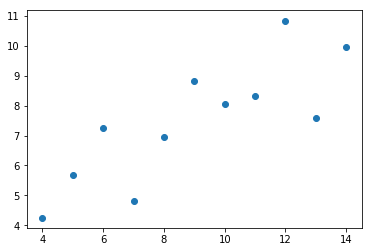

In [23]:
# Zestaw 1
dd = d[['x1','y1']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())
plt.scatter(dd.x,dd.y)

          x     y
count 11.00 11.00
mean   9.00  7.50
std    3.32  2.03
min    4.00  3.10
25%    6.50  6.70
50%    9.00  8.14
75%   11.50  8.95
max   14.00  9.26
     x    y
x 1.00 0.82
y 0.82 1.00


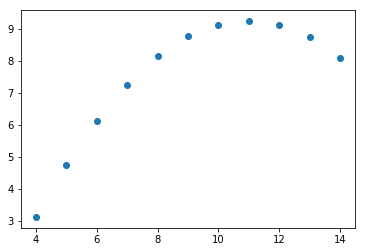

In [24]:
# Zestaw 2
dd = d[['x2','y2']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())
plt.scatter(dd.x,dd.y)

          x     y
count 11.00 11.00
mean   9.00  7.50
std    3.32  2.03
min    4.00  5.39
25%    6.50  6.25
50%    9.00  7.11
75%   11.50  7.98
max   14.00 12.74
     x    y
x 1.00 0.82
y 0.82 1.00


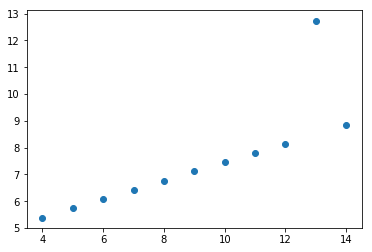

In [25]:
# Zestaw 3
dd = d[['x3','y3']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())
plt.scatter(dd.x,dd.y)

          x     y
count 11.00 11.00
mean   9.00  7.50
std    3.32  2.03
min    8.00  5.25
25%    8.00  6.17
50%    8.00  7.04
75%    8.00  8.19
max   19.00 12.50
     x    y
x 1.00 0.82
y 0.82 1.00


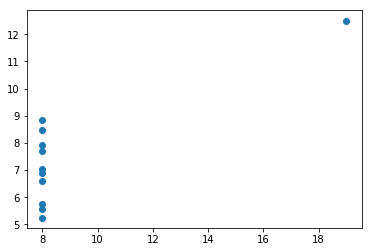

In [26]:
# Zestaw 4
dd = d[['x4','y4']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())
plt.scatter(dd.x,dd.y)

> **Pytanie** Co pokazuje kwartet Anscombe'a i jakie wnioski można z niego wyciągnąć ? 

## Dla dociekliwych
* [How to investigate a dataset with python?](https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e)
* [Wariancja, kowariancja i korelacja](https://pythonfordatascience.org/variance-covariance-correlation/)
* [Kowariancja i korelacja](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22)
* [Kwartet Anscombe'a](https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html)
* [Anscombosaurus](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html)

---
---
Historia zmian:
* wersja pierwotna r.akad 18/19: 04.2019 (MI)
* wersja r.akad 19/20: 7.04.2020 (MI)
* wersja r.akad 19/20: 9.04.2020 (GS)
* wersja r.akad 20/21: 23.10.2020 (MI)
* wersja r.akad 21/22: 13.11.2021 (MI) b.z.